## FDMS TME2
Florian Toque & Paul Willot


In [1]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

from sklearn.datasets import fetch_mldata
from sklearn import cross_validation
from sklearn import base
#mnist = fetch_mldata('iris')

import matplotlib.pyplot as plt


In [2]:
mnist = fetch_mldata('iris')

X= mnist.data
y= mnist.target

for idx,i in enumerate(y):
    if (i==2) or (i==3):
        y[idx]=-1

In [44]:
ds = sklearn.datasets.make_classification(n_samples=1000,
                                          n_features=30,
                                          n_informative=5,
                                          n_redundant=0,
                                          n_repeated=0,
                                          n_classes=2,
                                          n_clusters_per_class=1,
                                          weights=None,
                                          flip_y=0.01,
                                          class_sep=1.0,
                                          hypercube=True,
                                          shift=0.0,
                                          scale=1.0,
                                          shuffle=True,
                                          random_state=None)
X= ds[0]
y= ds[1]

In [45]:
# labels: [0,1] -> [-1,1]
for idx,i in enumerate(y):
    if (i==0):
        y[idx]=-1

print(X[0])
print(y[0])

[-1.27364469  0.02356197 -1.08270765  0.22599617 -0.00227098  0.43234736
  1.19211086 -1.46155316  0.6988265  -0.3363948   0.25245267 -1.57882464
  0.1156049  -0.48247961 -0.63926128 -2.12077057 -0.14984741 -0.42338417
 -0.10257689 -0.53742021  0.15679502 -0.96232177 -0.68356741 -0.6449277
  0.93808824 -0.44508003  0.87042622 -1.38836059 -0.97214535  1.74856654]
1


In [46]:
class SimpleGradientDescent:
    def __init__(self,theta,eps=0.01):
        self.theta=theta
        self.eps=eps
        
    def fit(self,X,y,nbIt=10000,printevery=1000):
        l=len(X)
        xTrans = X.transpose()
        for i in xrange(0,nbIt):
            hypothesis = np.dot(X, self.theta)
            loss = hypothesis - y
            cost = np.sum(loss ** 2) / (2 * l)
            if i%printevery==0:
                print("Iteration %s | Cost: %f" % (str(i).ljust(6), cost))
            gradient = np.dot(xTrans, loss) / l
            self.theta = self.theta - self.eps * gradient
    def predict(self,x):
        #print("Product: %f"%(np.dot(x,self.theta)))
        return 1 if np.dot(x,self.theta)>0 else -1
    def score(self,X,y):
        cpt=0.0
        for idx,i in enumerate(X):
            cpt += 1 if self.predict(i)==y[idx] else 0
        print(cpt,len(X))
        return cpt/len(X)

---
### L1

In [47]:
class GradientDescent(base.BaseEstimator):
    def __init__(self,theta,lamb,eps):
        self.theta=theta
        self.eps=eps
        self.lamb=lamb
        self.used_features=len(theta)

    def fit(self,X,y,nbIt=1000,printevery=-1):
        l=len(X)
        xTrans = X.transpose()
        
        for i in xrange(0,nbIt):
            index = np.random.randint(l)
            loss = np.dot(X, self.theta) - y
            #cost = np.sum(loss ** 2) / (2 * l) + (self.lamb*np.linalg.norm(self.theta))
            
            
            cost = np.sum(loss ** 2) * (1 / l) + (self.lamb*np.linalg.norm(self.theta))
            #gradient = np.dot(xTrans,(np.dot(theta,xTrans)-y))+np.sign(theta)*self.lamb
            #thetaprime = self.theta - self.eps * gradient
            
            gradient = np.dot(xTrans,(np.dot(self.theta,xTrans)-y))
            #thetaprime = self.theta - self.eps * gradient
            #thetaprime = self.theta - self.eps * np.sign(theta)*self.lamb
            
            if i%(nbIt/100)==0:
                thetaprime = self.theta - self.eps * (np.sign(theta)*self.lamb)
            else:
                thetaprime = self.theta - self.eps * gradient
            
            for k in xrange(0,len(theta)):
                self.theta[k] = 0 if thetaprime[k]*theta[k]<0 else thetaprime[k]
                
            #self.tmp=self.theta
            if printevery!=-1 and i%printevery==0:
                    print("Iteration %s | Cost: %f | Score: %.03f" % (str(i).ljust(6), cost,self.score(X,y)))
                    ttt = self.nb_used_features()
                    print("%d features used"%(ttt))
                    self.used_features=ttt
            elif i%1000==0:
                ttt = self.nb_used_features()
                self.used_features=ttt
            #self.used_features=self.nb_used_features()
            #ttt = self.nb_used_features()
            #self.used_features=ttt
            
                
    def predict(self,x):
        #print("Product: %f"%(np.dot(x,self.theta)))
        ret=[]
        for i in x:
            ret.append(1 if np.dot(i,self.theta)>0 else -1)
        return ret
    
    def score(self,X,y):
        cpt=0.0
        allpred = self.predict(X)
        for idx,i in enumerate(allpred):
            cpt += 1 if i==y[idx] else 0
        #print(cpt,len(X))
        return cpt/len(X)
    
    def nb_used_features(self):
        cpt=0
        for ii in self.theta:
            if ii==0:
                cpt+=1
        return len(self.theta)-cpt

In [48]:
import copy
#theta = np.zeros(len(X[0]))

theta = copy.deepcopy(X[0])
lamb=300
eps=0.00001

#gd = SimpleGradientDescent(theta,eps)
gd = GradientDescent(theta,lamb,eps)
#gd.tmp

In [49]:
nbIterations = 1000
gd.fit(X,y,nbIterations,printevery=nbIterations/10)
scores = cross_validation.cross_val_score(gd, X, y, cv=5,scoring="accuracy")
print("Cross validation scores: %s, mean: %.02f"%(scores,np.mean(scores)))

Iteration 0      | Cost: 1500.042117 | Score: 0.526
29 features used
Iteration 100    | Cost: 484.232259 | Score: 0.630
29 features used
Iteration 200    | Cost: 222.540594 | Score: 0.758
28 features used
Iteration 300    | Cost: 134.755933 | Score: 0.852
19 features used
Iteration 400    | Cost: 114.286452 | Score: 0.874
13 features used
Iteration 500    | Cost: 110.157391 | Score: 0.873
10 features used
Iteration 600    | Cost: 109.149157 | Score: 0.876
8 features used
Iteration 700    | Cost: 108.737909 | Score: 0.876
8 features used
Iteration 800    | Cost: 108.542392 | Score: 0.876
8 features used
Iteration 900    | Cost: 108.446069 | Score: 0.876
8 features used
Cross validation scores: [ 0.885  0.845  0.865  0.84   0.89 ], mean: 0.86


In [55]:
eps=0.00001
la = []
cross_sc = []
used_features = []

for lamb in np.arange(0,3000,200):
    theta = copy.deepcopy(X[0])
    gd = GradientDescent(theta,lamb,eps)
    nbIterations = 5000
    gd.fit(X,y,nbIterations)
    scoresSvm = cross_validation.cross_val_score(gd, X, y, cv=5,scoring="accuracy")
    print("Lamda: %s | Cross val mean: %.03f | Features: %d"%(str(lamb).ljust(5),np.mean(scoresSvm),gd.used_features))
    #print("Lamda: %.02f | Cross val mean: %.02f | Features: %d"%(lamb,gd.score(X,y),gd.used_features))
    cross_sc.append(np.mean(scoresSvm))
    la.append(lamb)
    used_features.append(gd.used_features)

Lamda: 0     | Cross val mean: 0.864 | Features: 30
Lamda: 200   | Cross val mean: 0.869 | Features: 28
Lamda: 400   | Cross val mean: 0.870 | Features: 24
Lamda: 600   | Cross val mean: 0.870 | Features: 20
Lamda: 800   | Cross val mean: 0.872 | Features: 17
Lamda: 1000  | Cross val mean: 0.872 | Features: 12
Lamda: 1200  | Cross val mean: 0.872 | Features: 9
Lamda: 1400  | Cross val mean: 0.871 | Features: 8
Lamda: 1600  | Cross val mean: 0.873 | Features: 8
Lamda: 1800  | Cross val mean: 0.872 | Features: 6
Lamda: 2000  | Cross val mean: 0.871 | Features: 5
Lamda: 2200  | Cross val mean: 0.871 | Features: 4
Lamda: 2400  | Cross val mean: 0.871 | Features: 3
Lamda: 2600  | Cross val mean: 0.870 | Features: 3
Lamda: 2800  | Cross val mean: 0.870 | Features: 3


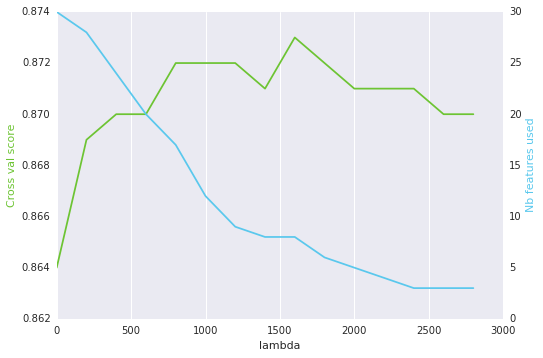

In [56]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(la, cross_sc, '#6DC433')
ax2.plot(la, used_features, '#5AC8ED')

ax1.set_xlabel('lambda')
ax1.set_ylabel('Cross val score', color='#6DC433')
ax2.set_ylabel('Nb features used', color='#5AC8ED')

ax1.yaxis.grid(False)
ax2.grid(False)
plt.show()

---
### L2

In [ ]:
class GradientDescentL2(base.BaseEstimator):
    def __init__(self,theta,lamb,eps):
        self.theta=theta
        self.eps=eps
        self.lamb=lamb

    def fit(self,X,y,nbIt=1000,printevery=-1):
        l=len(X)
        xTrans = X.transpose()
        
        for i in xrange(0,nbIt):
            index = np.random.randint(l)
            loss = np.dot(X, self.theta) - y
            cost = np.sum(loss ** 2) / (2 * l) + (self.lamb*(np.linalg.norm(-self.theta)**2))
            gradient = np.dot(xTrans,(np.dot(theta,xTrans)-y))+np.sign(theta)*self.lamb
            thetaprime = self.theta - self.eps * gradient
            
            for k in xrange(0,len(theta)):
                theta[k] = 0 if thetaprime[k]*theta[k]<0 else thetaprime[k]

            if printevery!=-1 and i%printevery==0:
                    print("Iteration %s | Cost: %f" % (str(i).ljust(6), cost))
                
    def predict(self,x):
        #print("Product: %f"%(np.dot(x,self.theta)))
        ret=[]
        for i in x:
            ret.append(1 if np.dot(i,self.theta)>0 else -1)
        return ret
    
    def score(self,X,y):
        cpt=0.0
        allpred = self.predict(X)
        for idx,i in enumerate(allpred):
            cpt += 1 if i==y[idx] else 0
        print(cpt,len(X))
        return cpt/len(X)

In [ ]:
theta = np.zeros(len(X[0]))
lamb=0.05
eps=0.00001
gd = GradientDescentL2(theta,lamb,eps)

nbIterations = 20000
gd.fit(X,y,nbIterations,printevery=nbIterations/10)

print("Score: %s"%gd.score(X,y))

scoresSvm = cross_validation.cross_val_score(gd, X, y, cv=5,scoring="accuracy")
print("Cross validation scores: %s, mean: %.02f"%(scoresSvm,np.mean(scoresSvm)))

In [ ]:
eps=0.00001
la = []
cross_sc = []

for lamb in np.arange(0,12,0.5):
    theta = np.zeros(len(X[0]))
    gd = GradientDescentL2(theta,lamb,eps)
    nbIterations = 5000
    gd.fit(X,y,nbIterations)
    scoresSvm = cross_validation.cross_val_score(gd, X, y, cv=5,scoring="accuracy")
    print("Lamda: %.02f, Cross val mean: %.02f"%(lamb,np.mean(scoresSvm)))
    cross_sc.append(np.mean(scoresSvm))
    la.append(lamb)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(la,cross_sc)
plt.ylabel('Cross val score')
plt.xlabel('lambda')
plt.show()